In [2]:
import numpy as np
import math

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.ibmq import least_busy
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-08-05 09:58:29,086: Credentials are already in use. The existing account in the session will be replaced.


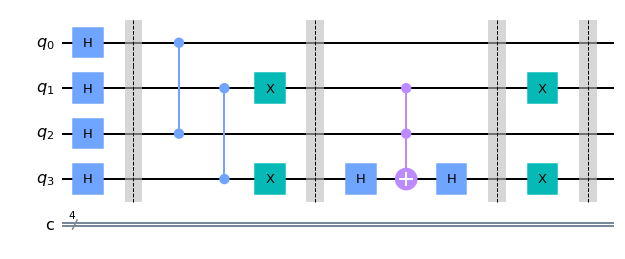

In [29]:
# Transpile for simulator
simulator = Aer.get_backend('aer_simulator')
qc = transpile(qc, simulator)

# Run and get statevector
result = simulator.run(qc).result()
statevector = result.get_statevector(qc)
#plot_state_qsphere(statevector)
print(statevector)

Statevector([ 0.25-3.06161700e-17j,  0.25-3.06161700e-17j,
              0.25-6.12323400e-17j,  0.25-6.12323400e-17j,
             -0.25+6.12323400e-17j,  0.25-6.12323400e-17j,
              0.25-6.12323400e-17j, -0.25+6.12323400e-17j,
              0.25+4.93538145e-33j,  0.25+8.01686936e-33j,
             -0.25+3.06161700e-17j, -0.25+3.06161700e-17j,
              0.25-3.06161700e-17j, -0.25+3.06161700e-17j,
             -0.25+3.06161700e-17j,  0.25-3.06161700e-17j],
            dims=(2, 2, 2, 2))


In [36]:
def shader():
    q_shader = QuantumCircuit(4)
    q_shader.cz(0,2)
    q_shader.cz(1,3)

    q_shader.x(1)
    q_shader.x(3)

    # We need to implement our own ccz gate.
    q_shader.h(3)
    q_shader.ccx(1,2,3)
    q_shader.h(3)

    q_shader.x(1)
    q_shader.x(3)
    
    q_shader = q_shader.to_gate()
    q_shader.name = "Shader Circuit"
    
    return q_shader
    

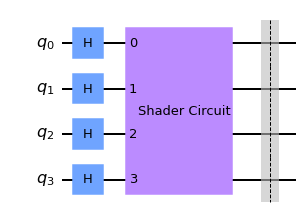

In [42]:
qc = QuantumCircuit(4)

for i in range(4):
    qc.h(i)
    
qc.append(shader(), range(4))
qc.save_statevector()

qc.draw()

In [43]:
# Transpile for simulator
simulator = Aer.get_backend('aer_simulator')
qc = transpile(qc, simulator)

# Run and get statevector
result = simulator.run(qc).result()
statevector = result.get_statevector(qc)
#plot_state_qsphere(statevector)
print(statevector)

Statevector([ 0.25-4.03283454e-33j,  0.25-5.77499456e-34j,
              0.25+3.06161700e-17j,  0.25+3.06161700e-17j,
             -0.25+6.86187045e-33j,  0.25-8.13826454e-33j,
              0.25+3.06161700e-17j, -0.25-3.06161700e-17j,
              0.25+3.06161700e-17j,  0.25+3.06161700e-17j,
             -0.25-6.12323400e-17j, -0.25-6.12323400e-17j,
              0.25+3.06161700e-17j, -0.25-3.06161700e-17j,
             -0.25-6.12323400e-17j,  0.25+6.12323400e-17j],
            dims=(2, 2, 2, 2))


In [55]:
def grover():
    q_grover = QuantumCircuit(4)
    for i in range(4):
        q_grover.h(i)
    for i in range(4):
        q_grover.x(i)   
        
    # We need a 3 controlled Z gate.
    q_grover.h(3)
    q_grover.mcx([0,1,2],3)
    q_grover.h(3)
    
    for i in range(4):
        q_grover.x(i)
    for i in range(4):
        q_grover.h(i)  
        
    q_grover = q_grover.to_gate()
    q_grover.name = "Grover's Diffuser"
    
    return q_grover
    

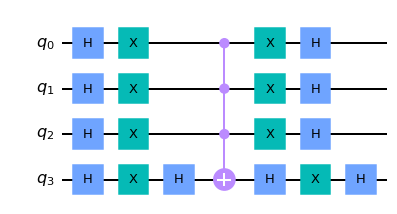

In [49]:
    q_grover = QuantumCircuit(4)
    for i in range(4):
        q_grover.h(i)
    for i in range(4):
        q_grover.x(i)   
        
    # We need a 3 controlled Z gate.
    q_grover.h(3)
    q_grover.mcx([0,1,2],3)
    q_grover.h(3)
    
    for i in range(4):
        q_grover.x(i)
    for i in range(4):
        q_grover.h(i)  
    q_grover.draw()

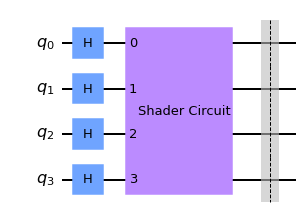

In [51]:
qc = QuantumCircuit(4)

for i in range(4):
    qc.h(i)

qc.append(shader(),range(4))
qc.save_statevector()

qc.draw()

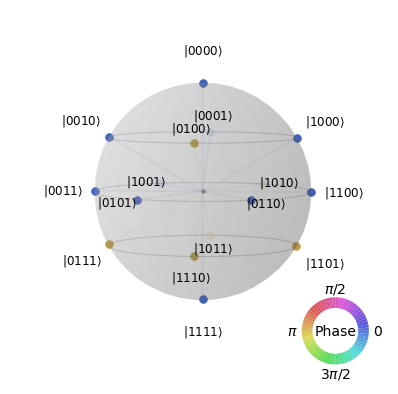

In [53]:
# Transpile for simulator
simulator = Aer.get_backend('aer_simulator')
qc = transpile(qc, simulator)

# Run and get statevector
result = simulator.run(qc).result()
statevector = result.get_statevector(qc)
plot_state_qsphere(statevector)

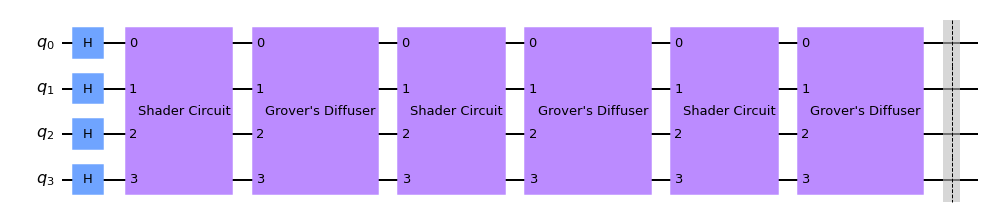

In [67]:
qc = QuantumCircuit(4)

for i in range(4):
    qc.h(i)

qc.append(shader(),range(4))
qc.append(grover(),range(4))
qc.append(shader(),range(4))
qc.append(grover(),range(4))
qc.append(shader(),range(4))
qc.append(grover(),range(4))
qc.save_statevector()

qc.draw()

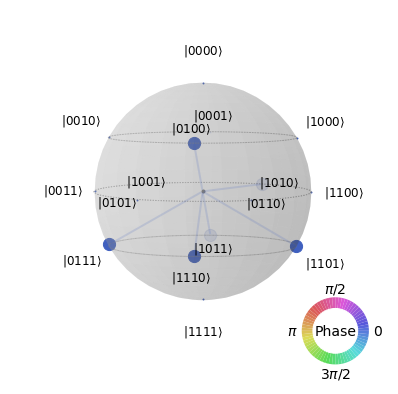

In [69]:
# Transpile for simulator
simulator = Aer.get_backend('aer_simulator')
qc = transpile(qc, simulator)

# Run and get statevector
result = simulator.run(qc).result()
statevector = result.get_statevector(qc)
plot_state_qsphere(statevector)